# **Automatically Tagging of Stack Overflow Posts**

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

**Importing the dataset**

Available on Google Cloud (BigQuery)


In [2]:
dataSet = pd.read_csv('/content/drive/My Drive/Stack Overflow/Stack Overflow.csv')

print('Data shape (rows, cols): ', dataSet.shape)
dataSet

Data shape (rows, cols):  (40000, 2)


,post,tags
0,small margin / gap at the top of document i h...,css
1,mastermind/bulls and cows game checkguess in p...,python
2,can i add a controller directly to a module wi...,angularjs
3,add fiter dynamically to ng-repeat i want add...,angularjs
4,label to display rating and border of the labl...,ios
...,...,...
39995,multiple radio button groups who send data in ...,ruby-on-rails
39996,how to ship applications with some preferences...,iphone
39997,instantiating object from class type in object...,objective-c
39998,adding an element within an appended element ...,javascript


In [3]:
dataSet['post'][0]

'small margin / gap at the top of document  i have come across this before a while back and forgotten what the solution was. i have a small gap at the very top of my document  maybe 5/10px     i think you will know what i am talking about  how do i get rid of this     thanks'

In [4]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   post    40000 non-null  object
 1   tags    40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


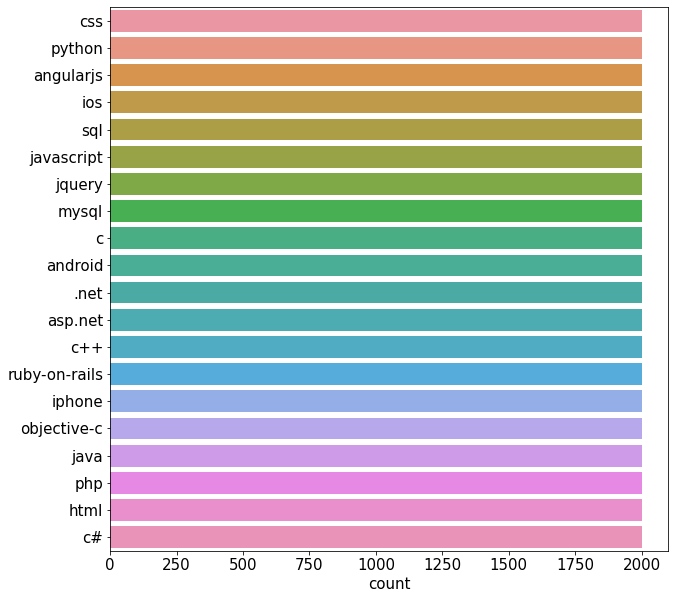

In [5]:
plt.figure(figsize=(10, 10))
font = {'weight': 'normal','size': 15}
plt.rc('font', **font)
plt.xlabel('Sentiment')
sns.countplot(y = dataSet['tags'].values)
plt.show()

**Text Pre-processing**

In [6]:
X = dataSet['post']
y = dataSet['tags'].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
import re
import nltk
from bs4 import BeautifulSoup

corpus = []

for text in dataSet['post']:
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = text.split()  # Spliting text into words
    text = ' '.join(text)  #Joining text
    corpus.append(text)

In [8]:
le.classes_

array(['.net', 'android', 'angularjs', 'asp.net', 'c', 'c#', 'c++', 'css',
       'html', 'ios', 'iphone', 'java', 'javascript', 'jquery', 'mysql',
       'objective-c', 'php', 'python', 'ruby-on-rails', 'sql'],
      dtype=object)

**Splitting the dataset into the Training set and Test set**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size = 0.2, random_state = 0)

**Features Extraction**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=18000, ngram_range=(1, 1))
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [11]:
X_train.shape

(32000, 18000)

In [12]:
def report(y_test, y_pred):
  from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
  import seaborn as sns

  cm = confusion_matrix(y_test, y_pred)
  cm = pd.DataFrame(cm, le.classes_, le.classes_)
  print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
  print('\n')

  plt.figure(figsize=(15, 15))
  sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt = 'd', annot_kws={"size": 15}).set_title('Confusion Matrix')
  plt.show()

In [13]:
acc = {}

##Training The Model Using BernoulliNB

Accuracy:	0.712




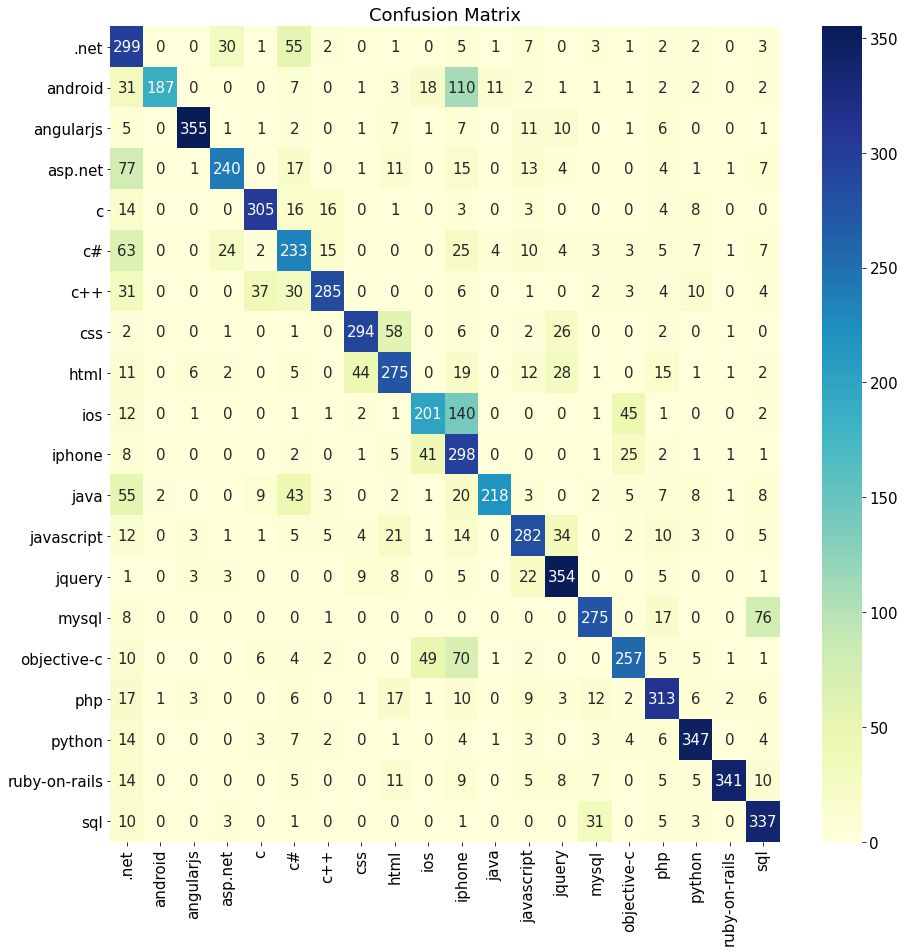

In [14]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['BernoulliNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using ComplementNB

Accuracy:	0.7705




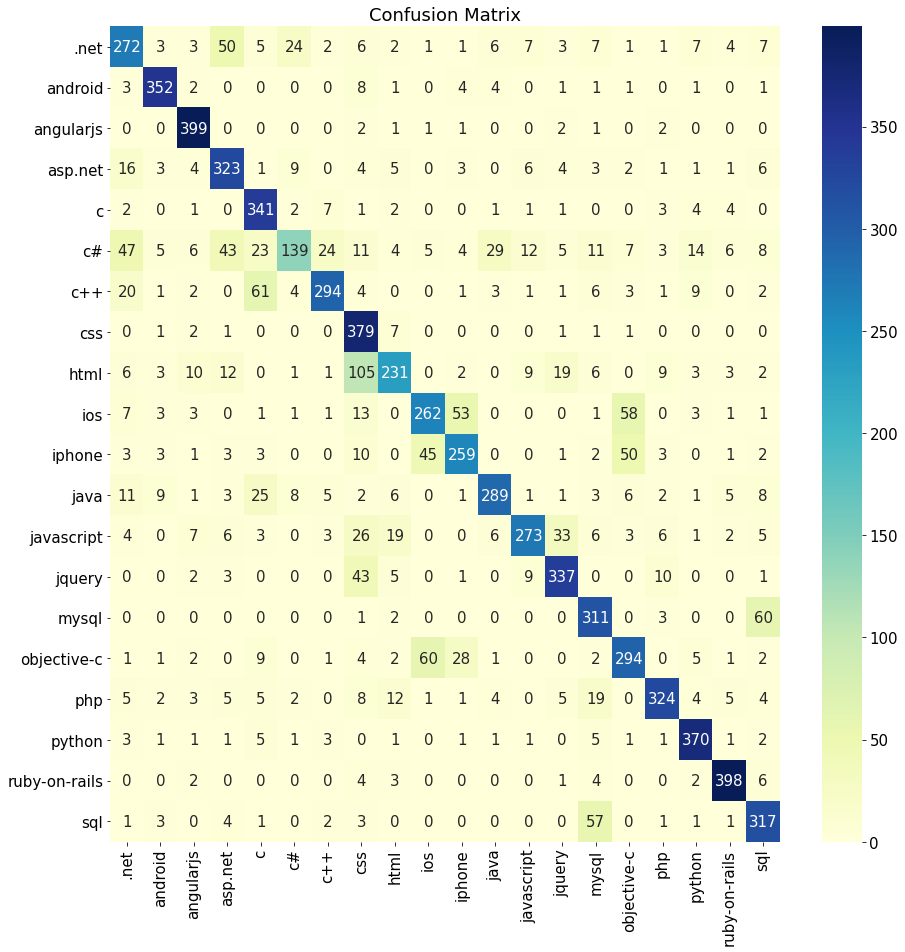

In [15]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB(alpha=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['ComplementNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using MultinomialNB

Accuracy:	0.74




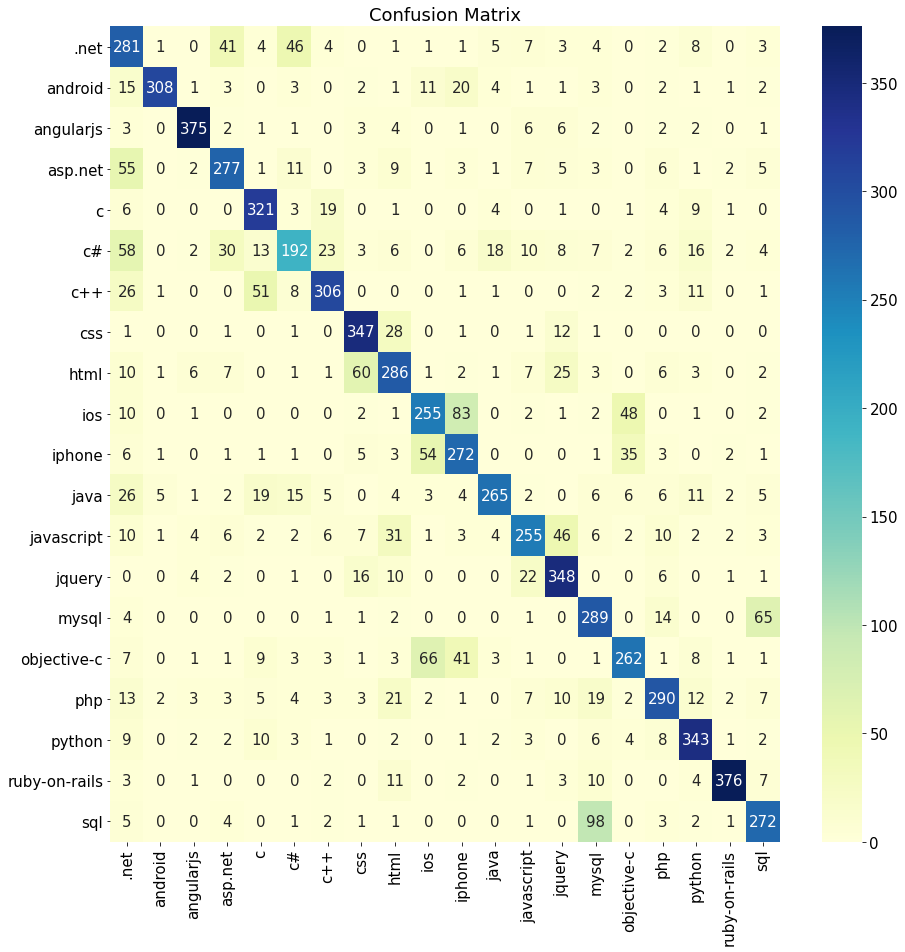

In [16]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['MultinomialNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using LinearSVC

Accuracy:	0.8155




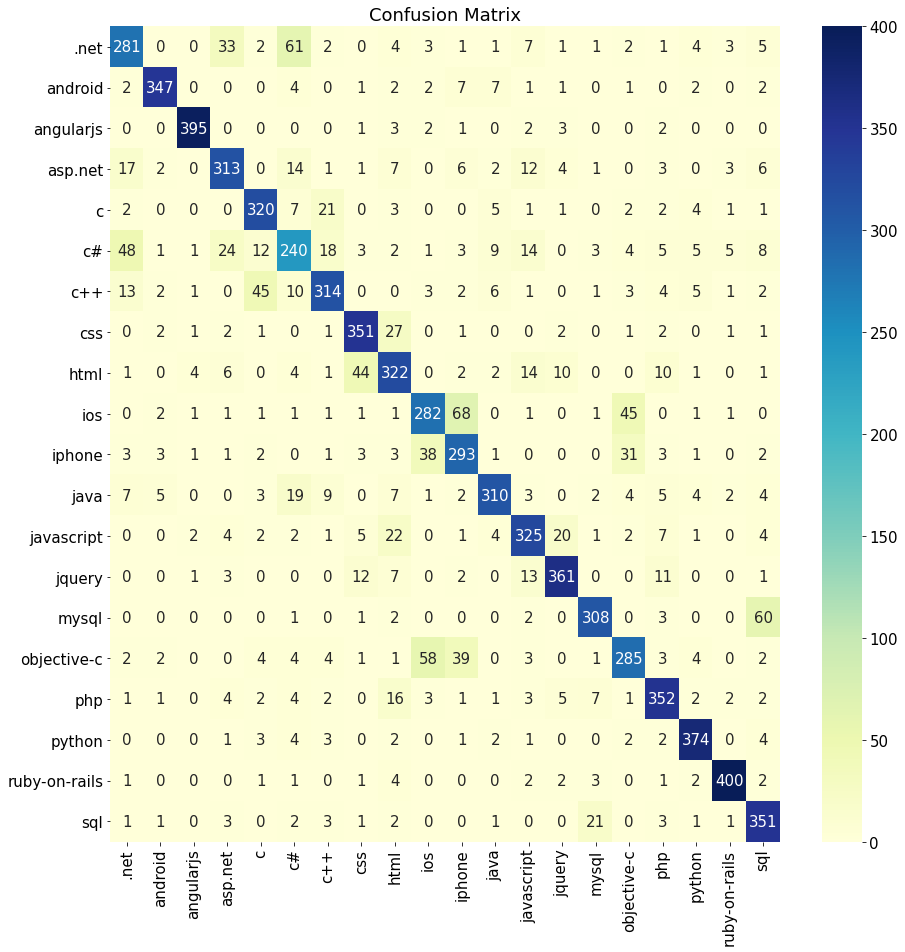

In [17]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=0.2, random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['LinearSVC'] = accuracy_score(y_test, y_pred)

##Training The Model Using SGDClassifier

Accuracy:	0.80825




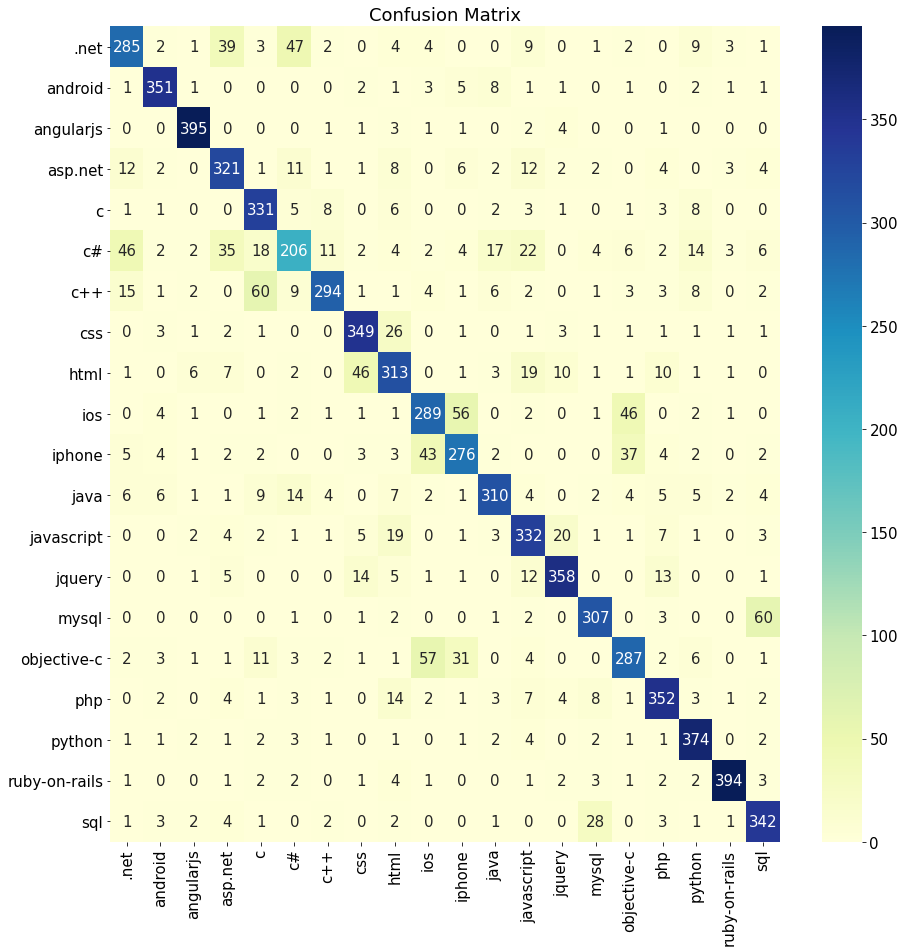

In [18]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['SGDClassifier'] = accuracy_score(y_test, y_pred)

In [19]:
pd.DataFrame(data = acc.values(),
             index = acc.keys(),
             columns = ['Accuracy']).sort_values(ascending = False, by = ['Accuracy'])

,Accuracy
LinearSVC,0.81550
SGDClassifier,0.80825
ComplementNB,0.77050
MultinomialNB,0.74000
BernoulliNB,0.71200
